## Import packages and load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
cancer = load_breast_cancer()

In [4]:
X = cancer['data']
y = cancer['target']

In [5]:
X.shape

(569, 30)

In [6]:
#number of target = 1 samples
np.mean(y)

0.6274165202108963

## Train Test Data Split (70/30)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=101)

## Default Values

In [53]:
rfc = RandomForestClassifier(random_state=0)

In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
#Note the 100% training accuracy which is a sign of overfitting
print('Training Score: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(rfc.score(X_test, y_test)))

Training Score: 1.00
Test Score: 0.95


In [56]:
pred = rfc.predict(X_test)

In [58]:
#8 wrong predictions out of 171 test samples
print(confusion_matrix(y_test, pred))

[[ 59   5]
 [  3 104]]


In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Build a less complex model to avoid overfitting and increase number of trees

In [63]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=0)

In [64]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
print('Training Score: {:.2f}'.format(rfc.score(X_train, y_train)))
print('Test Score: {:.2f}'.format(rfc.score(X_test, y_test)))

Training Score: 0.96
Test Score: 0.95


In [66]:
pred = rfc.predict(X_test)

In [67]:
#8 wrong predictions out of 171 test samples
print(confusion_matrix(y_test, pred))

[[ 58   6]
 [  2 105]]


## Feature Importances

In [68]:
print('Feature Importances:')
print(rfc.feature_importances_)

Feature Importances:
[0.04848974 0.00526524 0.04536773 0.05281483 0.00055167 0.01219226
 0.07060645 0.11366216 0.00061007 0.00068496 0.01935851 0.00056051
 0.01429612 0.03994566 0.00020848 0.00183063 0.00269141 0.00290234
 0.00041242 0.00064289 0.11036717 0.00483398 0.14897941 0.11431732
 0.00275048 0.01087034 0.02998795 0.13902182 0.00233461 0.00344284]


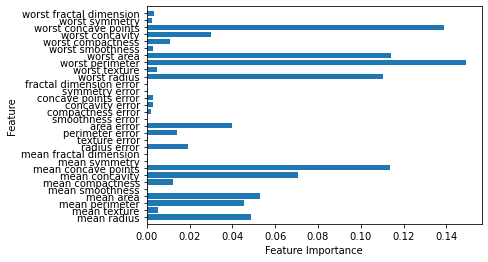

In [69]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), rfc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.ylim(-1, n_features);